# Importando bibliotecas e dados 

In [62]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt

import statsmodels.api as sm
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objects as go
import seaborn as sns
sns.set()

In [19]:
df = pd.read_csv('./data/BTC.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace = True)
df = df.drop(columns=['ticker'])
df

,open,high,low,close
date,,,,
2010-07-17,0.04951,0.04951,0.04951,0.04951
2010-07-18,0.04951,0.08585,0.04951,0.08584
2010-07-19,0.08584,0.09307,0.07723,0.08080
2010-07-20,0.08080,0.08181,0.07426,0.07474
2010-07-21,0.07474,0.07921,0.06634,0.07921
...,...,...,...,...
2023-11-26,37746.00000,37835.80000,37170.00000,37667.60000
2023-11-27,37667.60000,37667.60000,36716.20000,37084.00000
2023-11-28,37084.00000,38396.60000,36871.70000,37883.10000


# Exploração dos dados

In [14]:
#descrição do dataframe
df.describe()

,open,high,low,close
count,4885.000000,4885.000000,4885.000000,4885.000000
mean,9891.705714,10143.264436,9618.282224,9899.751951
std,14829.630280,15204.430068,14409.726141,14834.622789
min,0.049510,0.049510,0.010000,0.049510
25%,219.670000,226.720000,211.000000,220.340000
50%,1179.220000,1213.880000,1136.880000,1180.780000
75%,11521.800000,11827.500000,11241.800000,11528.000000
max,67304.600000,68976.500000,66343.000000,67305.100000


 - O valor máximo atigindo pelo BTC é de $68976.50

In [13]:
#correlação entre as varíaveis
df.corr(method='pearson').style.background_gradient(cmap='coolwarm')

,open,high,low,close
open,1.000000,0.999572,0.999244,0.999105
high,0.999572,1.000000,0.999128,0.999592
low,0.999244,0.999128,1.000000,0.999528
close,0.999105,0.999592,0.999528,1.000000


In [15]:
#verificando valores nulos
df.isnull().sum()

open     0
high     0
low      0
close    0
dtype: int64

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

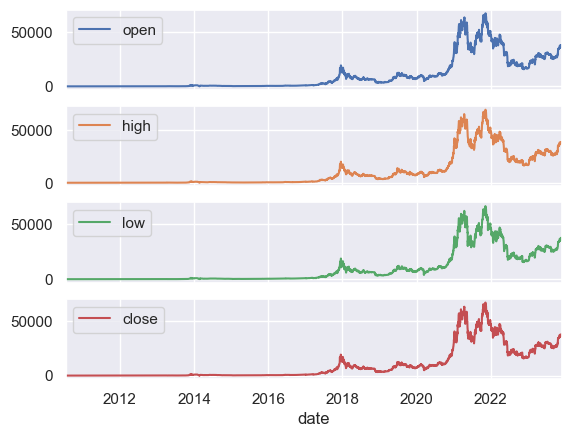

In [16]:
df.plot(subplots=True)

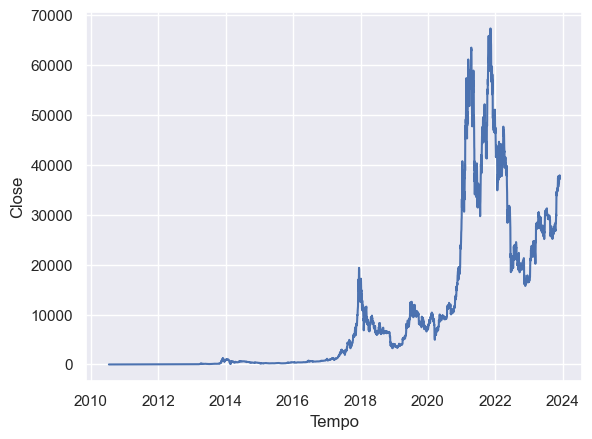

<Figure size 500000x45000 with 0 Axes>

In [50]:
#Analisando o valores de fechamento do mercado

plt.plot_date(df.index, df['close'], '-')
plt.xlabel('Tempo')
plt.ylabel('Close')
plt.figure(figsize=(5000, 450))
plt.show()

In [49]:
print(df.loc[df['high'] == df['high'].max()])

               open     high      low    close
date                                          
2021-11-10  67304.6  68976.5  63526.0  65145.6


 - A primeira alta da moeda foi em 2018, mas somente depois de 2020 ela teve um aumento muito grande em seus valores
 - O maior valor de fechamento registrado foi dia 10/11/2021
 - Após uma grande queda entre os anos de 2022 e 2023, ela se mantém em crescimento para o próximo ano

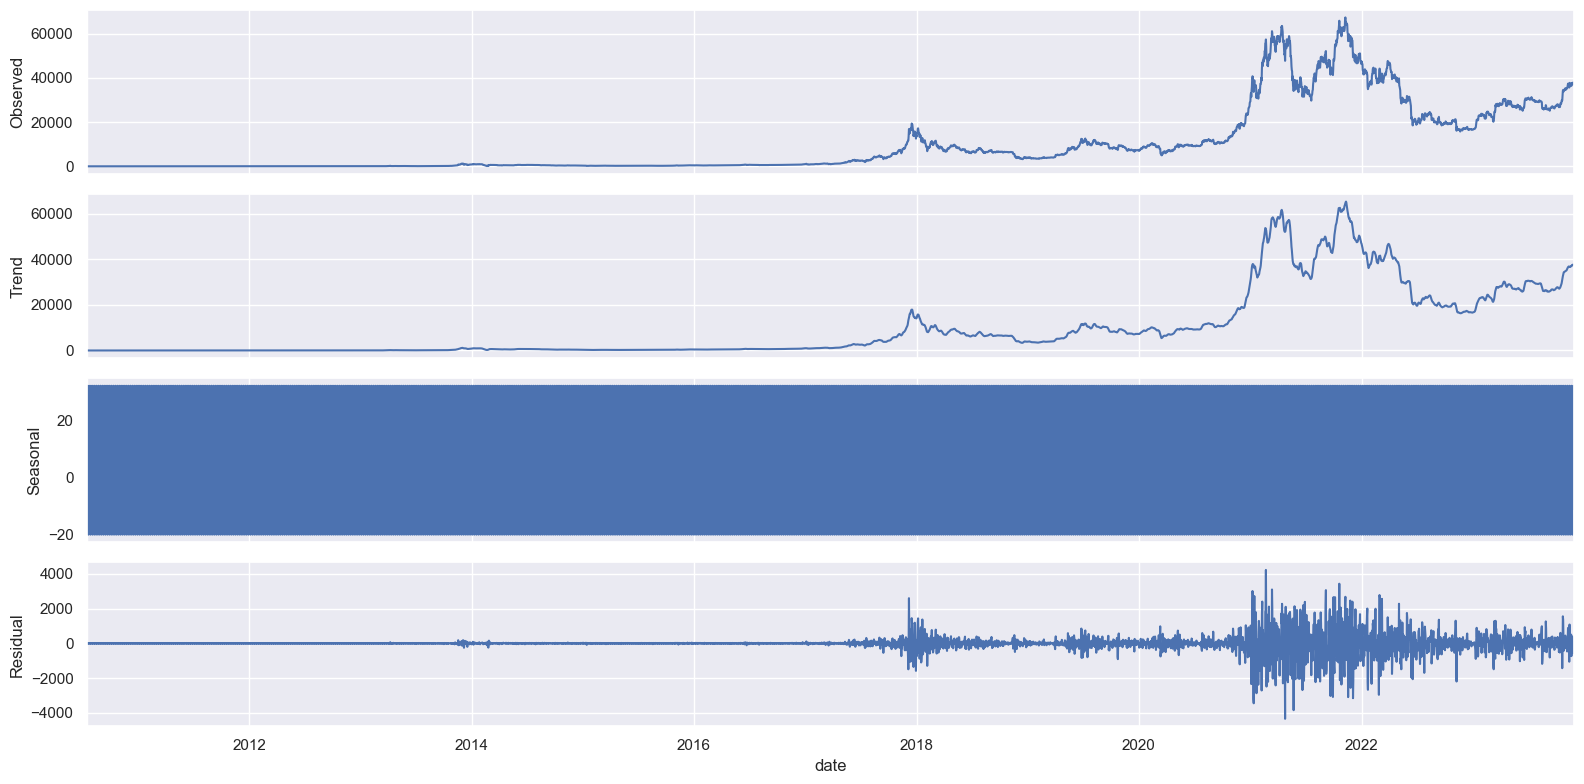

In [63]:
decomposition = sm.tsa.seasonal_decompose(df['close'], model='additive')
fig, axes = plt.subplots(4, 1, figsize=(16, 8), sharex=True)

decomposition.observed.plot(ax=axes[0])
decomposition.trend.plot(ax=axes[1])
decomposition.seasonal.plot(ax=axes[2])
decomposition.resid.plot(ax=axes[3])

axes[0].set_ylabel('Observed')
axes[1].set_ylabel('Trend')
axes[2].set_ylabel('Seasonal')
axes[3].set_ylabel('Residual')

plt.tight_layout()
plt.show()

--> Observed (observado): Nosso gráfico original.

--> Trend (tendência): Representa a direção geral dos dados ao longo do tempo de forma suavizada.

--> Seasonal (sazonalidade): Representa os padrões que se repetem em intervalos regulares.

--> Residual (resíduos): Representa os erros ou ruídos restantes após a remoção da tendência e da sazonalidade dos dados.

Com esses gráficos conseguimos perceber algumas coisas:
 - O BTC não teve uma sazonalidade específica durante o período, houve um padrão de alta e baixa
 - Existe grandes ruídos nos momentos de pico do valor de fechamento, mas após o ano 2022 ele vem diminuindo comparado ao anos anteriores